<a href="https://colab.research.google.com/github/chiusanghung/Stock-Prediction/blob/main/MSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load_data
df_link = '/content/drive/MyDrive/Dataset/MSN.csv'

df = pd.read_csv(df_link, index_col='Date/Time', parse_dates=True)

In [4]:
df.shape

(135354, 7)

In [5]:
df.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2017-12-25 09:15:00,MSN,73.1,73.1,73.1,73.1,4210,0
2017-12-25 09:16:00,MSN,73.0,73.0,73.0,73.0,5000,0
2017-12-25 09:18:00,MSN,73.5,73.5,73.5,73.5,210,0
2017-12-25 09:20:00,MSN,73.2,73.5,73.1,73.1,2050,0
2017-12-25 09:21:00,MSN,73.0,73.0,73.0,73.0,1380,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135354 entries, 2017-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Open           135354 non-null  float64
 2   High           135354 non-null  float64
 3   Low            135354 non-null  float64
 4   Close          135354 non-null  float64
 5   Volume         135354 non-null  int64  
 6   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ MB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [8]:
df1=pd.DataFrame(df,columns=('Date/Time','Close'))
#df1.index=df1.Date
df1.drop("Date/Time",axis=1,inplace=True)

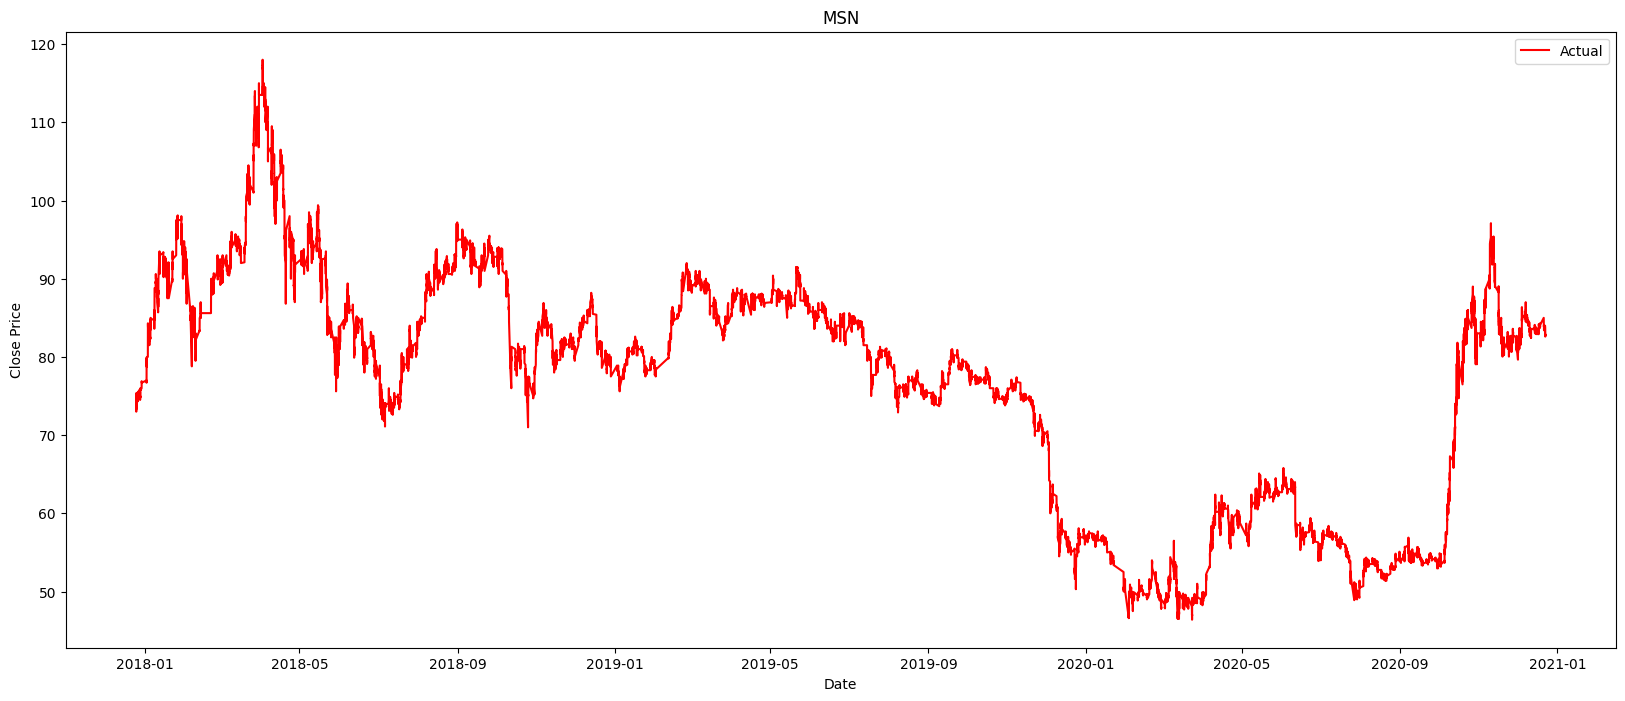

In [9]:
plt.figure(figsize=(20,8))
plt.plot(df1['Close'], label='Actual', color='red')
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [10]:
df1

,Close
Date/Time,
2017-12-25 09:15:00,73.1
2017-12-25 09:16:00,73.0
2017-12-25 09:18:00,73.5
2017-12-25 09:20:00,73.1
2017-12-25 09:21:00,73.0
...,...
2020-12-22 14:23:00,82.8
2020-12-22 14:24:00,82.8
2020-12-22 14:25:00,82.8


In [11]:
data = df1.values
train_data = data[:100000]
test_data = data[100000:]

In [12]:
data

array([[73.1],
       [73. ],
       [73.5],
       ...,
       [82.8],
       [82.8],
       [82.8]])

In [13]:
sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(data)

In [14]:
x_train, y_train = [],[]
for i in range(50, len(train_data)):
  x_train.append(sc_train[i-50:i, 0])
  y_train.append(sc_train[i, 0])

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [16]:
model = Sequential()
model.add(LSTM(units = 128, input_shape=(x_train.shape[1], 1), return_sequences = True))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [18]:
save_model='MSN.hdf5'
best_model = ModelCheckpoint(save_model, monitor='loss',verbose=2,save_best_only=True,modee='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.02882, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0288 - 12s/epoch - 6ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.02882 to 0.01756, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0176 - 12s/epoch - 6ms/step
Epoch 3/100

Epoch 3: loss improved from 0.01756 to 0.01717, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0172 - 12s/epoch - 6ms/step
Epoch 4/100

Epoch 4: loss improved from 0.01717 to 0.01691, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0169 - 12s/epoch - 6ms/step
Epoch 5/100

Epoch 5: loss improved from 0.01691 to 0.01670, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0167 - 12s/epoch - 6ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01670 to 0.01662, saving model to MSN.hdf5
1999/1999 - 12s - loss: 0.0166 - 12s/epoch - 6ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.01662
1999/1999 - 12s - loss: 0.0166 - 12s/epoch - 6ms/step
Epoch 8/100

Epoch 8: loss improved from 0.01662 to 0.01648, saving model to MSN.hdf5
1999/1999 - 11s - loss: 0.0165 - 11s/epoch - 6ms/step
Epoch 9/100

Epoch 9: loss improved from 0.01648 to 0.01647, s

In [20]:
y_train = sc.inverse_transform(y_train)
final_model = load_model('MSN.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

3124/3124 [==============================] - 13s 4ms/step


In [44]:
#Test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test=[]
for i in range(50, test.shape[0]):
  x_test.append(sc_test[i-50:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#data test
y_test = data[100000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

1105/1105 [==============================] - 4s 3ms/step


<ipython-input-45-77ec3da8ce20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predict'] = y_train_predict #add data
<ipython-input-45-77ec3da8ce20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predict'] = y_test_predict


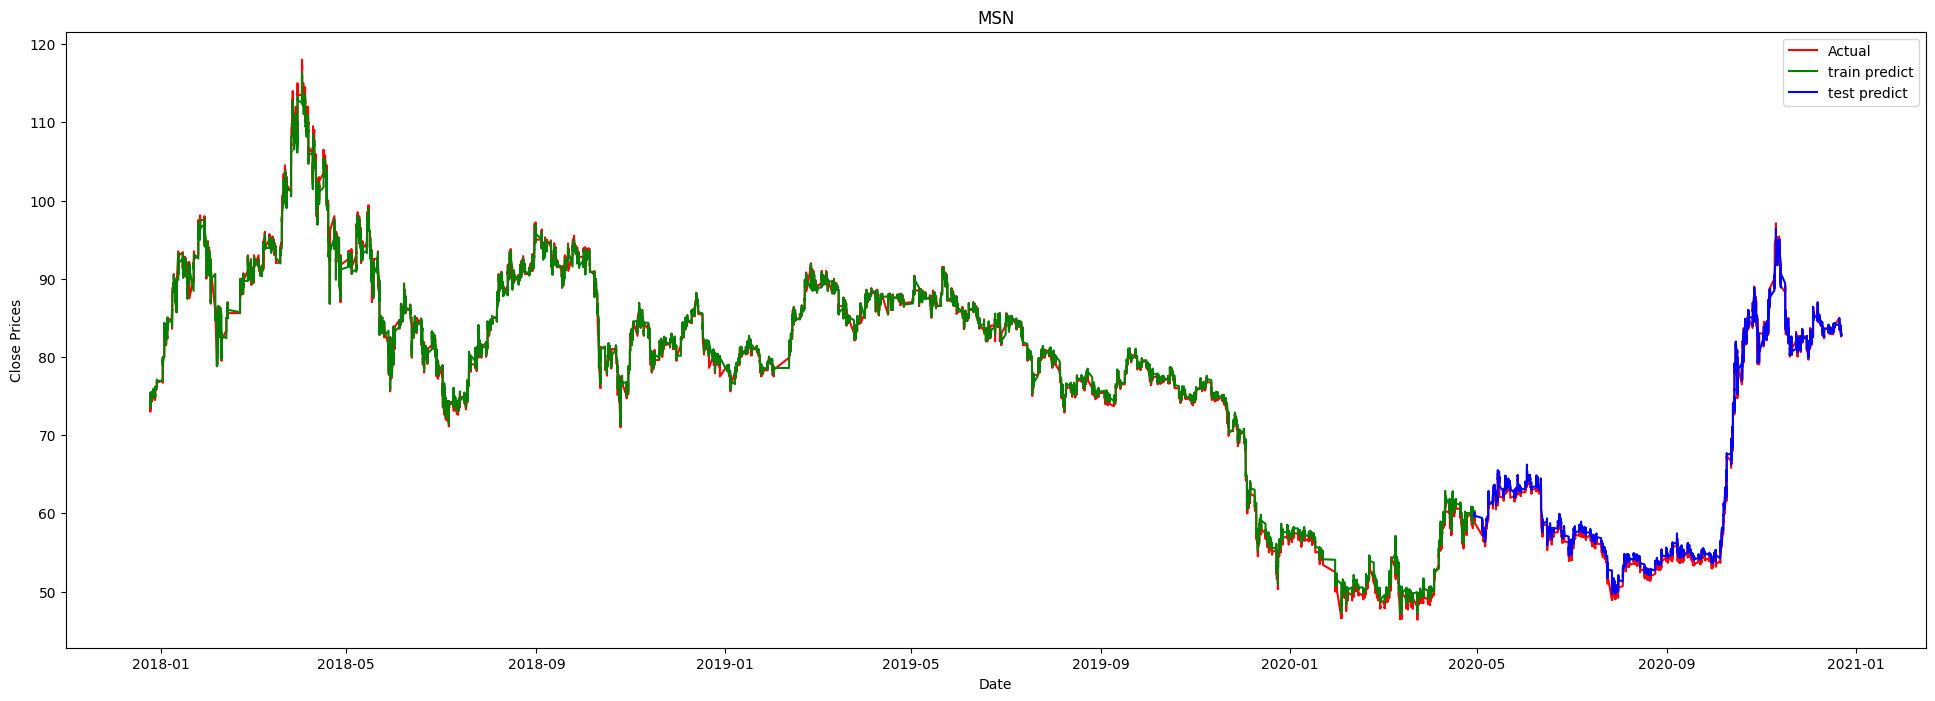

In [45]:
train_data1 = df1[50:100000]
test_data1 = df1[100000:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Actual',color='red') #line actual
train_data1['Predict'] = y_train_predict #add data
plt.plot(train_data1['Predict'], label='train predict',color='green') #line train predict
test_data1['Predict'] = y_test_predict
plt.plot(test_data1['Predict'], label='test predict',color='blue') #line test predict
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [49]:
train_data1

,Close,Predict
Date/Time,,
2017-12-25 10:55:00,74.1,74.445137
2017-12-25 10:57:00,74.1,74.403313
2017-12-25 10:59:00,74.1,74.389580
2017-12-25 11:00:00,74.1,74.385864
2017-12-25 11:02:00,74.0,74.384499
...,...,...
2020-04-29 13:09:00,59.1,59.720913
2020-04-29 13:10:00,59.3,59.657280
2020-04-29 13:11:00,59.3,59.799831


In [50]:
print('Accuracy Score', r2_score(y_test, y_test_predict))
print('Average absolute error', mean_absolute_error(y_test, y_test_predict))
print('Mean absolute error percentage', mean_absolute_percentage_error(y_test, y_test_predict))

Accuracy Score 0.9981830585690691
Average absolute error 0.4865349312775977
Mean absolute error percentage 0.00823181775909693


In [51]:
test_data1

,Close,Predict
Date/Time,,
2020-04-29 13:14:00,59.1,59.649109
2020-04-29 13:15:00,59.1,59.641327
2020-04-29 13:16:00,59.1,59.640060
2020-04-29 13:17:00,59.1,59.639435
2020-04-29 13:18:00,59.2,59.638924
...,...,...
2020-12-22 14:23:00,82.8,82.889671
2020-12-22 14:24:00,82.8,82.892944
2020-12-22 14:25:00,82.8,82.893578
